# Problem Set 3
# MACS 301000
# Dr. Rick Evans

## Kevin Sun
## Wednesday, January 24, 2018

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as lin
import scipy.integrate as intgr
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
#load data into the environment
income = pd.read_csv("incomes.txt", header = None)
income.rename(columns={0: 'Income'}, inplace=True)
%matplotlib notebook

In [21]:
sts.describe(income)

DescribeResult(nobs=200, minmax=(array([ 47628.56063612]), array([ 139079.35154872])), mean=array([ 85276.82360626]), variance=array([  3.25358364e+08]), skewness=array([ 0.44355769]), kurtosis=array([-0.05243339]))

### 1a) Plot a histogram of percentages of the income.txt data with 30 bins. 

<IPython.core.display.Javascript object>


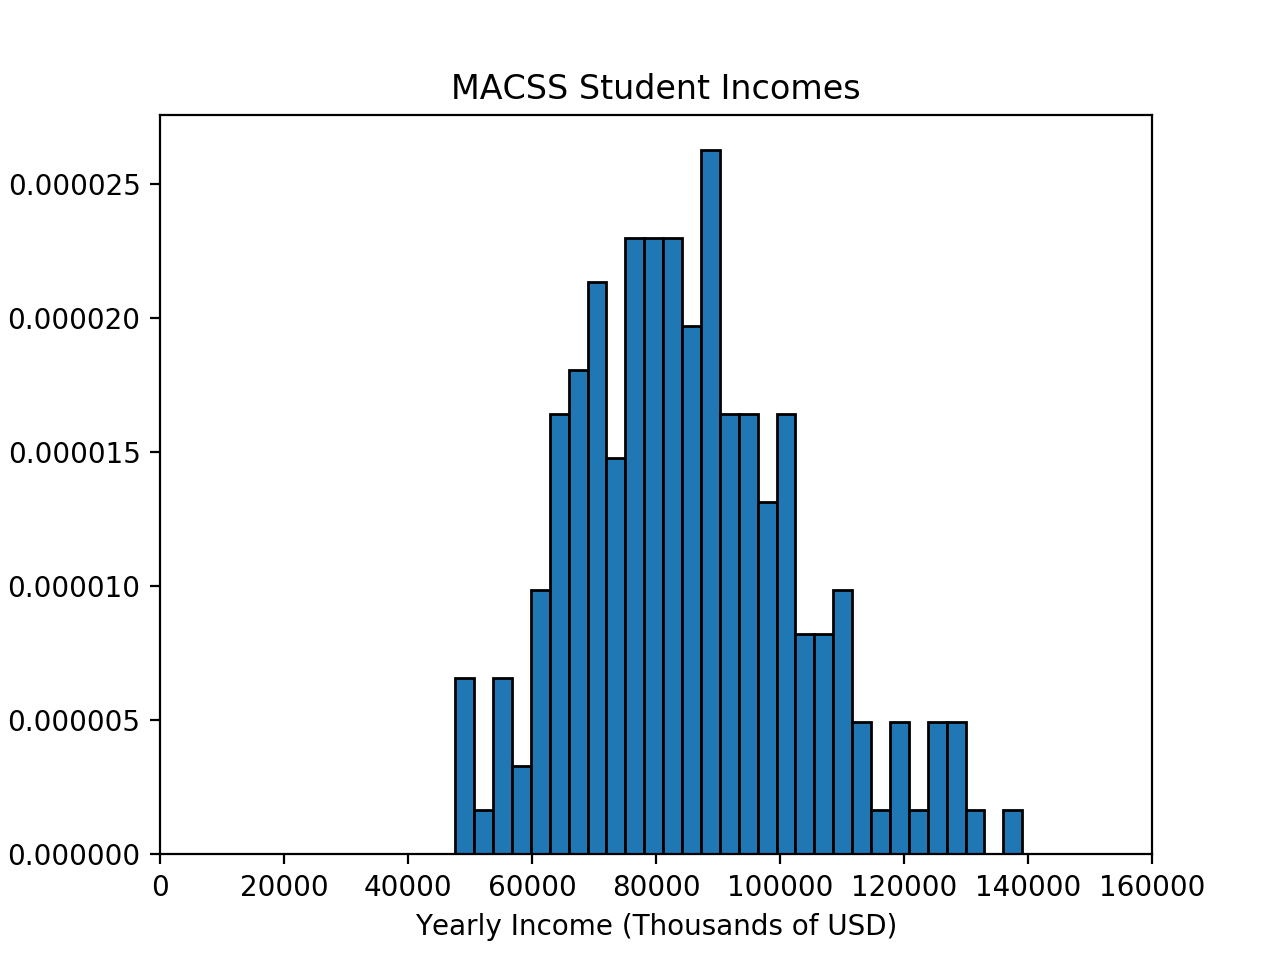

(0, 160000)

In [22]:
# Plotting the histogram of income data
plt.hist(income["Income"], bins=30, edgecolor="black", normed=True)
plt.title("MACSS Student Incomes")
plt.xlabel("Yearly Income (Thousands of USD)")
plt.ylabel("% of Graduates")
plt.xlim([0,160000])

### 1b) Estimate the parameters of the log normal distribution by generalized method of moments. 

### Use the average income and standard deviation of income as your two moments. Use the identity matrix as your weighting matrix Wˆ . 

### Report the value of your GMM criterion function at the estimated parameter values. Report and compare your two data moments against your two model moments at the estimated parameter values.

In [23]:
# Generate values of the lognormal distribution using the same lognormal pdf from PS2.
def log_norm_pdf(xvals, mu, sigma):
    '''
    This function generates the probability distribution function's (pdf) values. 
    
    Inputs:
        - xvals (vector/array): normally distributed log normally 
                                distributed random variables
        - mu (scalar/float): mean of log normally distributed random variable
        - sigma (scalar/float): standard deviation of log normally 
                                distributed random variable (sigma > 0)
    
    Outputs:
        - pdf_values (vector/array): log normal pdf values for mu and sigma corresponding
                                    to the xvals data
    '''
    pdf_vals = (1/(xvals * sigma * np.sqrt(2 * np.pi))) * np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))
    
    return pdf_vals

In [24]:
# Computing the moments from the income data
def data_moments (xvals):
    '''
    This function computes the data moments (average income (mu), and variance
    of income (var)) for the Generalized Method of Moments (GMM). 
    
    Inputs:
        - xvals (vector/array): MACSS student income data 
        
    Outputs: 
        - mean (scalar/float): mean of the income data
        - variance (scalar/float): variance of the income data
    
    '''
    mean_data = xvals.mean()
    sd_data = xvals.std()
    
    return mean_data, sd_data

In [25]:
# Computing the moments from the model
def model_moments(mu, sigma):
    '''
    This function computes the model moments (average income(mu), and variance of income (var)) for GMM.
    
    Inputs:
        - mu (scalar/float): mean of log normally distributed random variable
        - sigma (scarlar/float): standard deviation of log normally 
                                 distributed random variable (sigma > 0 )
    
    Outputs:
        - mean_model (scalar/float): mean value of modeled data
        - var_model (scalar/float): var value of modeled data
    '''
    var = sigma**2
    mean_model = np.exp(mu + (var/2))
    sigma_model = np.sqrt((np.exp(var)-1)*(np.exp(2*mu + var)))
    
    return mean_model, sigma_model

In [26]:
# Computing the moment errors for the GMM
def error_vector(xvals, mu, sigma):
    '''
    This function a vector of moment error for the GMM.
    
    Inputs:
        - xvals (vector/array): MACSS student income data
        - mu (scalar/float): mean of log normally distributed random variable
        - sigma (scalar/float): standard deviation of log normally 
                                distributed random variable (sigma > 0 )
   
   Outputs:
        - error_vec (matrix): column vector of two moment error funtions
    '''

    data_moment = np.array(data_moments(xvals)).reshape((2,1))
    model_moment = np.array(model_moments(mu, sigma)).reshape((2,1))
    error_vec = (data_moment - model_moment)/data_moment
    
    return error_vec

In [27]:
def criterion(parameters, *args):
    '''
    This functions computes the GMM weighted sum of squared moment errors 
    
    Inputs:
        - parameters (vector of mu, sigma) 
        - args (vector of xvals, W)
    
    Outputs:
        - GMM criterion function value
    '''
    mu, sigma = parameters
    xvals, W = args
    error = error_vector(xvals, mu, sigma)
    crit_val = np.dot(np.dot(error.T, W), error)
    
    return crit_val

In [28]:
# Perform the Generalized Method of Moments Estimation
mu_init = np.log(income["Income"].values).mean()
print("Initial mu:", mu_init)
sig_init = np.log(income["Income"].values).std()
#sig_init = np.log(income.std())
print("Initial sig:", sig_init)
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (income["Income"].values, W_hat)

results = opt.minimize(criterion, params_init, args=(gmm_args), method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM, sig_GMM = results.x
print("GMM Estimated mu:", mu_GMM)
print("GMM Estimated sig:", sig_GMM)

Initial mu: 11.3314403355
Initial sig: 0.211674587396
GMM Estimated mu: 11.3318848383
GMM Estimated sig: 0.208696331742


In [29]:
mean_data, std_data = data_moments(income["Income"])
mean_model, std_model = model_moments(mu_GMM, sig_GMM)
err = error_vector(income["Income"], mu_GMM, sig_GMM).reshape(2,)
print('Mean of points =', mean_data, ', Std. Dev. of points =', std_data)
print('Mean of model =', mean_model, ', Std. Dev. of model =', std_model)
print('Error vector=', err)


Mean of points = 85276.82360625808 , Std. Dev. of points = 18037.692869371564
Mean of model = 85277.1583751 , Std. Dev. of model = 17992.5836974
Error vector= [ -3.92567258e-06   2.50082825e-03]


<IPython.core.display.Javascript object>


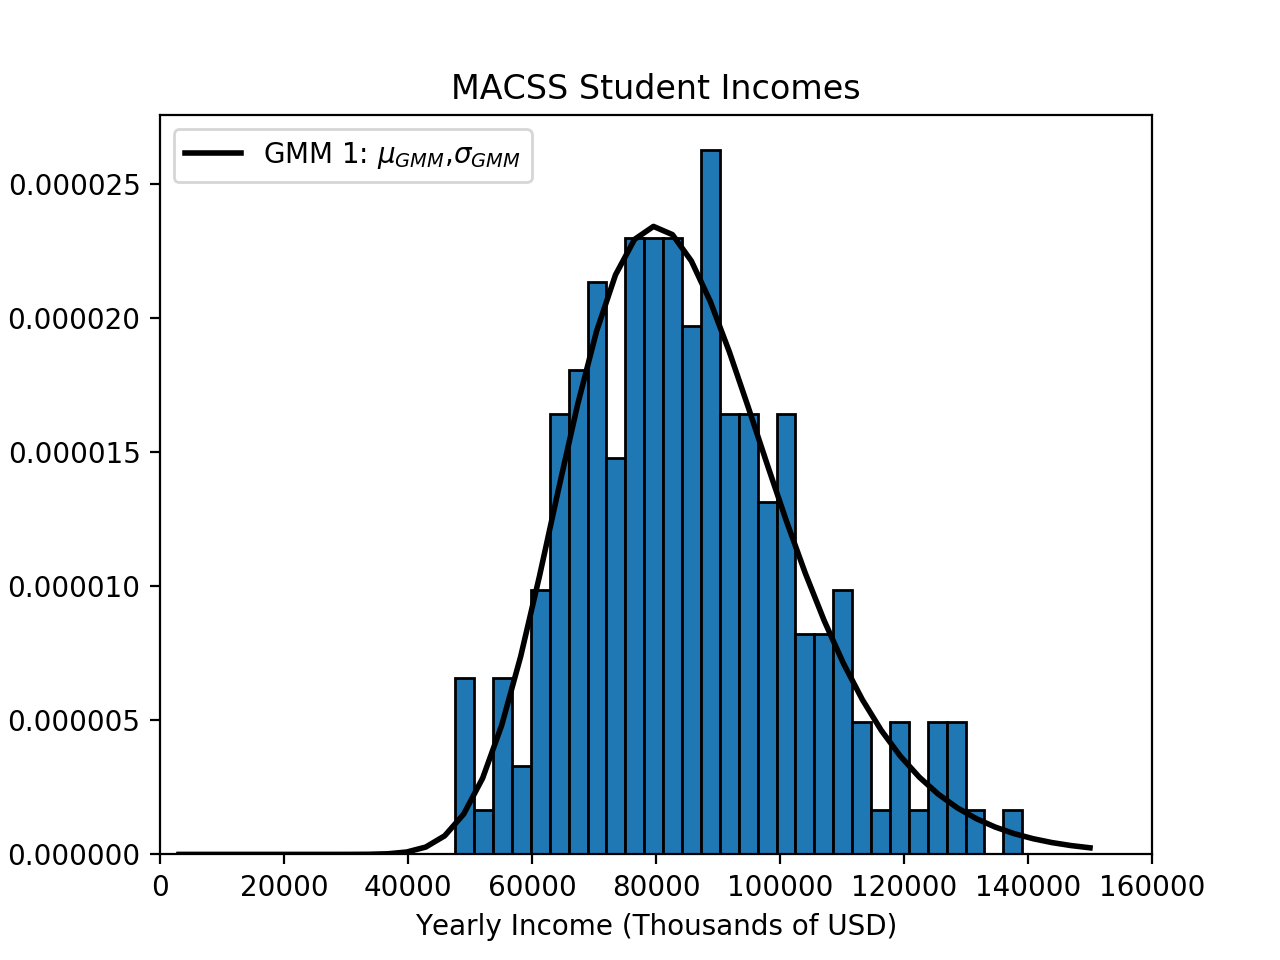

/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


In [31]:
# Plot GMM Estimate
plt.hist(income["Income"], bins=30, edgecolor="black", normed=True)
plt.title("MACSS Student Incomes")
plt.xlabel("Yearly Income (Thousands of USD)")
plt.ylabel("% of Graduates")
plt.xlim([0,160000])
dist_pts = np.linspace(0,150000)
plt.plot(dist_pts, log_norm_pdf(dist_pts, mu_GMM, sig_GMM),
         linewidth=2, color='k', label='GMM 1: $\mu_{GMM}$,$\sigma_{GMM}$')
plt.legend(loc='upper left')

### 1c) Perform the two-step GMM estimator by using your estimates from part (b) with two moments to generate an estimator for the variance covariance matrix Ωˆ2step, which you then use to get the two-step estimator for the optimal weighting matrix Wˆ 2step. 

### Plot your estimated lognormal PDF against the histogram from part (a) and the estimated PDF from part (b). 

In [32]:
# Calculating Variance Covariance Matrix and new Weighting Matrix

err2 = error_vector(income["Income"], mu_GMM, sig_GMM)
VCV2 = np.dot(err2, err2.T) / income["Income"].shape[0]
print("The Variance Covariance Matrix:") 
print(VCV2)
W_hat2 = lin.pinv(VCV2)
print("The Weighting Matrix:")
print(W_hat2)

The Variance Covariance Matrix:
[[  7.70545261e-14  -4.90871645e-11]
 [ -4.90871645e-11   3.12707097e-08]]
The Weighting Matrix:
[[  7.87989693e+01  -5.01984525e+04]
 [ -5.01984525e+04   3.19786497e+07]]


In [33]:
# Incorporating new Weighting Matrix into GMM
params_init = np.array([mu_GMM, sig_GMM])
args = (income["Income"], W_hat2)
results = opt.minimize(criterion, params_init, args=(args), 
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results.x

print("GMM #2 mu Estimate:", mu_GMM2)
print("GMM #2 sig Estimate:", sig_GMM2)

GMM #2 mu Estimate: 11.3319773228
GMM #2 sig Estimate: 0.20916919384


<IPython.core.display.Javascript object>


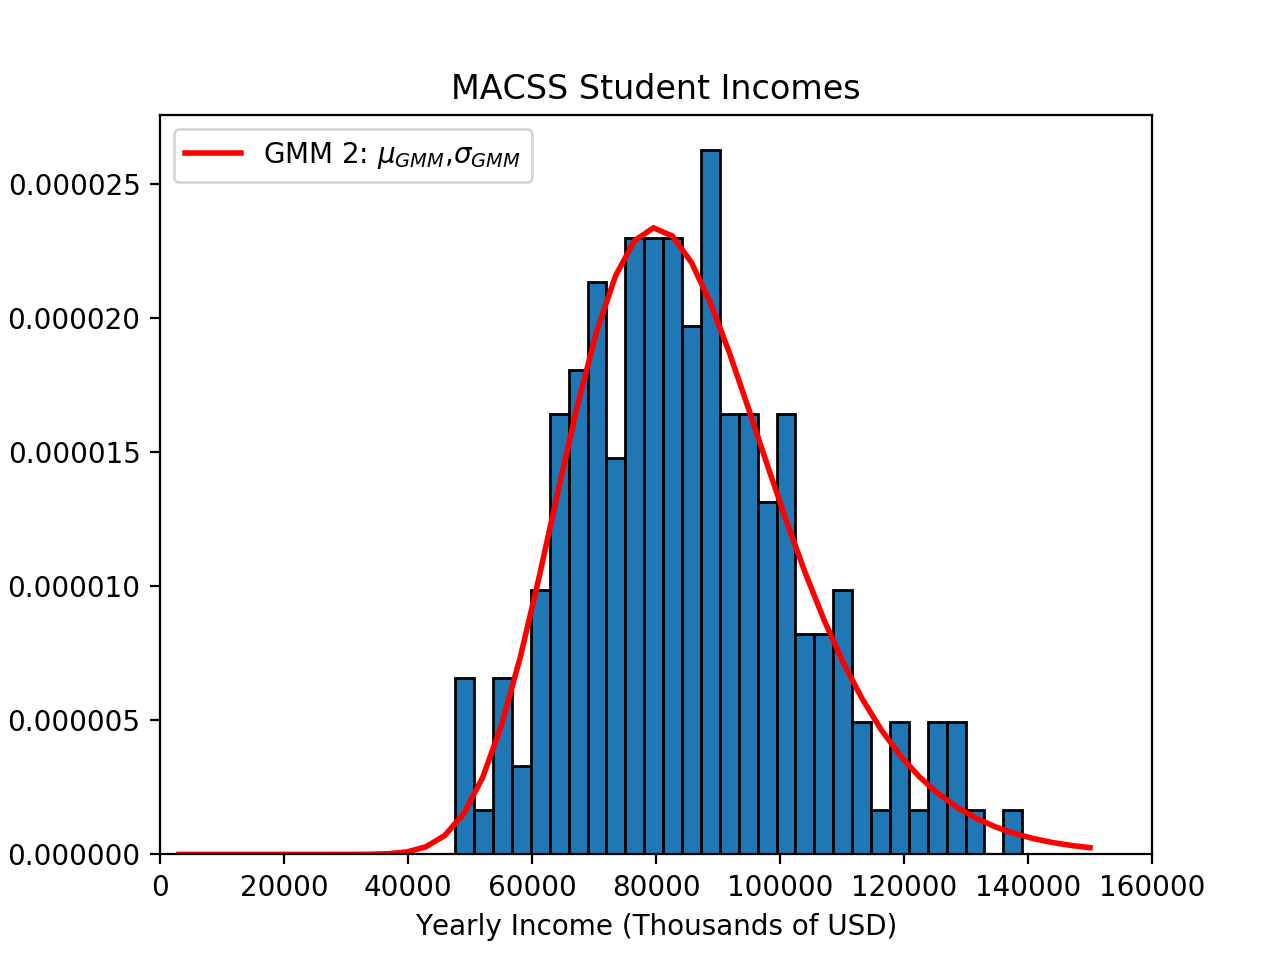

/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


In [34]:
# Plotting GMM #2
plt.hist(income["Income"], bins=30, edgecolor="black", normed=True)
plt.title("MACSS Student Incomes")
plt.xlabel("Yearly Income (Thousands of USD)")
plt.ylabel("% of Graduates")
plt.xlim([0,160000])

dist_pts = np.linspace(0,150000)
plt.plot(dist_pts, log_norm_pdf(dist_pts, mu_GMM2, sig_GMM2),
         linewidth=2, color='r', label='GMM 2: $\mu_{GMM}$,$\sigma_{GMM}$')
plt.legend(loc='upper left')

Utilizing the weighting matrix, our Generalized Method of Moments estimates the parameters to be quite similar to our GMM the first time when using the identity matrix as the weighting matrix. Conducting the two-step GMM estimator appears to have made little difference. This may be because the model fit the data relatively well under GMM 1. 

### 1d) Now estimate the lognormal PDF to fit the data by GMM using different moments. Use percent of individuals who earn less than 75,000, percent of individuals who earn between 75,000 and 100,000, and percent of in- dividuals who earn more than 100,000 as your three moments. 

### Use the identity matrix as your estimator for the optimal weighting matrix. Plot your estimated lognormal PDF against the histogram from part (a). Report the value of your GMM criterion function at the estimated parameter values. Report and compare your three data moments against your three model moments at the estimated parameter values.

Trying different moments based on income:
1. Percent of individuals making < 75,000
2. Percent of invididuals making between 75,000 and 100,000
3. Percent of individuals making > 100,000


In [35]:
#obtain percentages of individuals in each income "bracket"
def new_data_moments():
    
    #below75_dat = xvals[xvals < 75000].shape[0] / xvals.shape[0]
    #btwn75_100_dat = (xvals[(xvals >=75000) & (xvals < 100000)].shape[0] / xvals.shape[0])
    #above100_dat = xvals[xvals >=100000].shape[0] / xvals.shape[0]
    below75_dat = 0.3
    btwn75_100_dat = 0.5
    above100_dat = 0.2
    
    return below75_dat, btwn75_100_dat, above100_dat


import scipy.integrate as intgr
def new_model_moments(mu, sigma):
    below75_mod = sts.norm.cdf(np.log(75000), loc = mu, scale = sigma)
    btwn75_100_mod = sts.norm.cdf(np.log(100000), loc = mu, scale = sigma) - below75_mod
    above100_mod = 1 - sts.norm.cdf(np.log(100000), loc = mu, scale = sigma)
    
    return below75_mod, btwn75_100_mod, above100_mod

def new_error_vector(xvals, mu, sigma, simple):
    below75_dat, btwn75_100_dat, above100_dat = new_data_moments()
    
    moms_data = np.array([[below75_dat], [btwn75_100_dat], [above100_dat]])
    
    below75_mod, btwn75_100_mod, above100_mod = new_model_moments(mu, sigma)
    
    moms_model = np.array([[below75_mod], [btwn75_100_mod], [above100_mod]])
    
    if simple:
        error_vector = moms_model - moms_data
    else:
        error_vec = 100 * ((moms_model - moms_data) / moms_data)
    
    return error_vec

def criterion3(params, *args):
    mu, sigma = params
    xvals, W = args
    err = new_error_vector(xvals, mu, sigma, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val


In [36]:
# Results from GMM using the percentages specified in the problem
mu_init = 11.0
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
W_hat3 = np.eye(3)
gmm_args = (income, W_hat3)

results_new = opt.minimize(criterion3, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))

mu_GMM_new, sig_GMM_new = results_new.x
print('mu_GMM_new=', mu_GMM_new, ' sig_GMM_new=', sig_GMM_new)

mu_GMM_new= 11.3356813274  sig_GMM_new= 0.210598453721


<IPython.core.display.Javascript object>


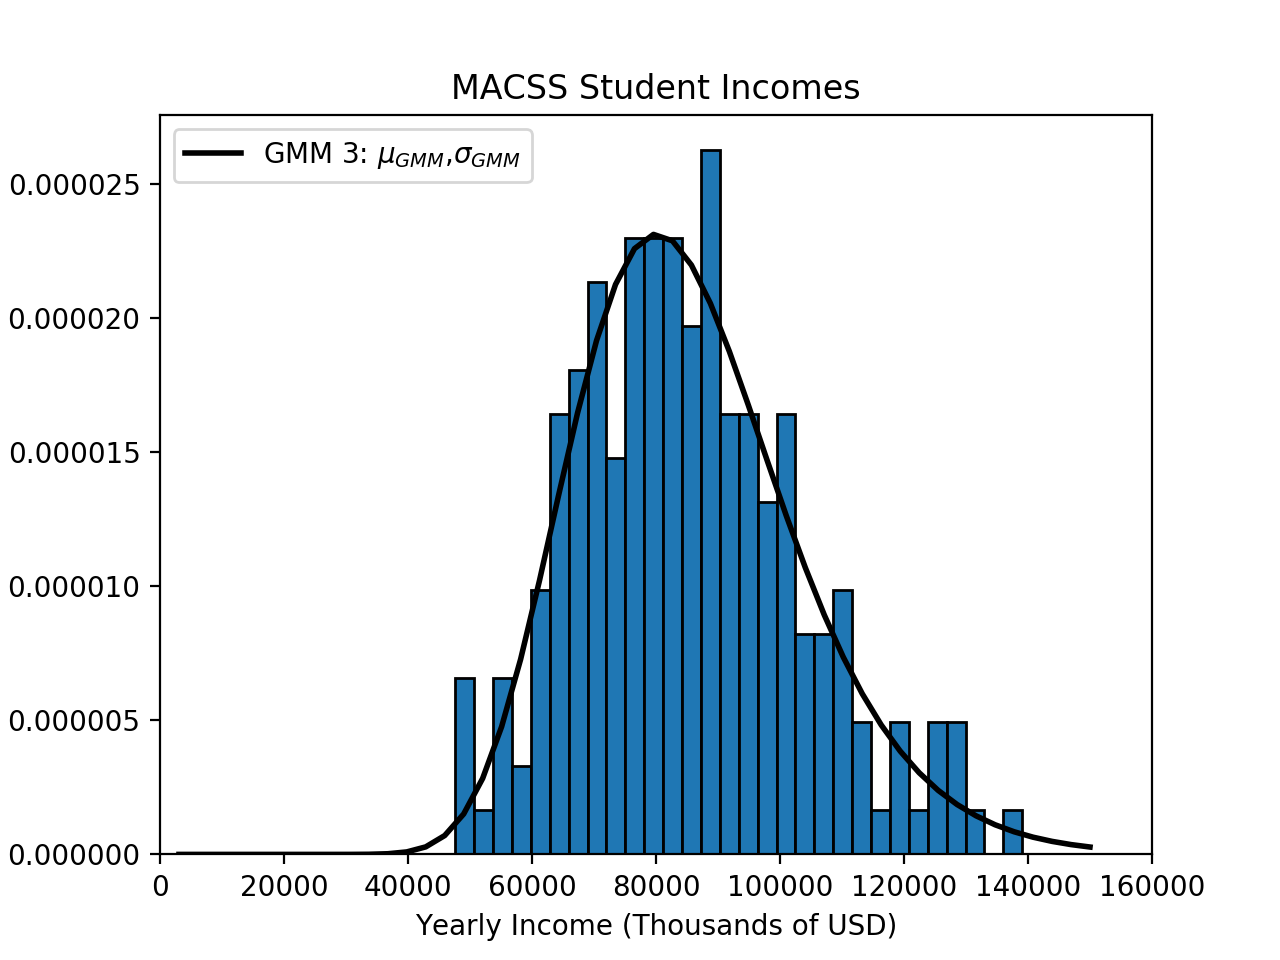

/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


In [37]:
# Plot GMM_new Estimate
plt.hist(income["Income"], bins=30, edgecolor="black", normed=True)
plt.title("MACSS Student Incomes")
plt.xlabel("Yearly Income (Thousands of USD)")
plt.ylabel("% of Graduates")
plt.xlim([0,160000])
dist_pts = np.linspace(0,150000)
plt.plot(dist_pts, log_norm_pdf(dist_pts, mu_GMM_new, sig_GMM_new),
         linewidth=2, color='k', label='GMM 3: $\mu_{GMM}$,$\sigma_{GMM}$')
plt.legend(loc='upper left')

In [38]:
print('The value of GMM criterion function:', results_new.fun)
below75_dat, btwn75_100_dat, above100_dat = new_data_moments()
below75_mod, btwn75_100_mod, above100_mod = new_model_moments(mu_GMM_new, sig_GMM_new)
err_3 = error_vector(income, mu_GMM_new, sig_GMM_new).reshape(2,)
print('Data Moments:', below75_dat, btwn75_100_dat, above100_dat)
print('Model Moments:',below75_mod, btwn75_100_mod, above100_mod)
print('Error vector=', err_3)

The value of GMM criterion function: [[  2.53378840e-11]]
Data Moments: 0.3 0.5 0.2
Model Moments: 0.300000003633 0.500000005854 0.199999990513
Error vector= [-0.00420802 -0.01102551]


### 1e) Perform the two-step GMM estimator by using your estimates from part (d) with three moments to generate an estimator for the variance covariance matrix Ωˆ2step, which you then use to get the two-step estimator for the optimal weighting matrix Wˆ 2step. 

### Plot your estimated log- normal PDF against the histogram from part (a) and the estimated PDF from part (d). 

In [39]:
# Calculating Variance Covariance Matrix and new Weighting Matrix

err3 = new_error_vector(income["Income"], mu_GMM_new, sig_GMM_new, False)
VCV3 = np.dot(err3, err3.T) / income["Income"].shape[0]
print("The Variance Covariance Matrix:") 
print(VCV3)
W_hat3 = lin.pinv(VCV3)
print("The Weighting Matrix:")
print(W_hat3)

The Variance Covariance Matrix:
[[  7.33126041e-15   7.08892667e-15  -2.87192073e-14]
 [  7.08892667e-15   6.85460324e-15  -2.77698981e-14]
 [ -2.87192073e-14  -2.77698981e-14   1.12503556e-13]]
The Weighting Matrix:
[[  4.56770398e+11   4.41671920e+11  -1.78933540e+12]
 [  4.41671920e+11   4.27072520e+11  -1.73018918e+12]
 [ -1.78933540e+12  -1.73018918e+12   7.00947604e+12]]


In [40]:
# Incorporating new Weighting Matrix into GMM

params_init = np.array([mu_GMM_new, sig_GMM_new])
args = (income["Income"], W_hat3)
results_final = opt.minimize(criterion3, params_init, args=(args), 
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM_end, sig_GMM_end = results.x

print("GMM Final mu Estimate:", mu_GMM_end)
print("GMM Final sig Estimate:", sig_GMM_end)

GMM Final mu Estimate: 11.3319773228
GMM Final sig Estimate: 0.20916919384


<IPython.core.display.Javascript object>


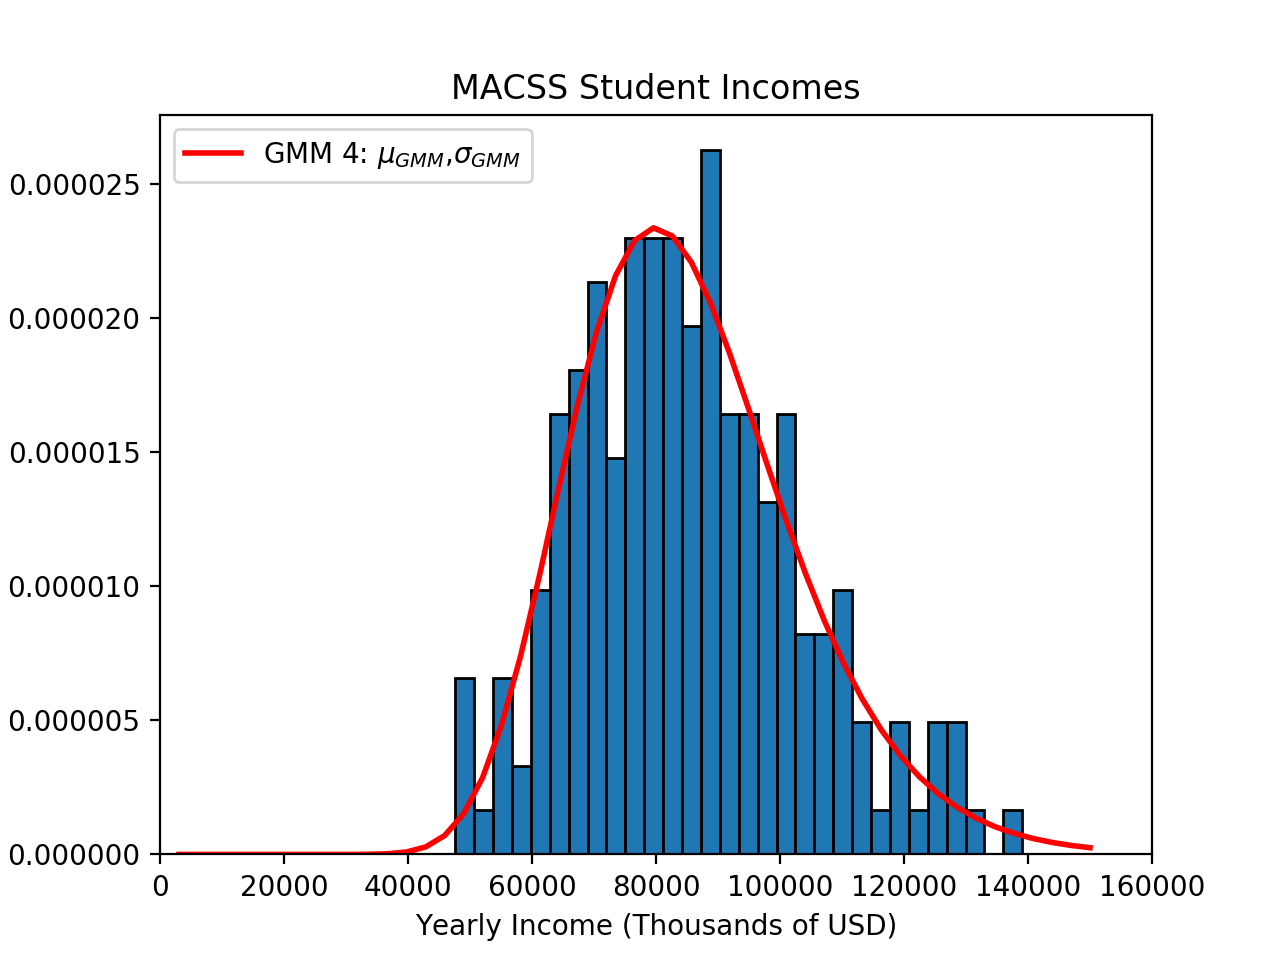

/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/Users/kevinsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


In [41]:
# Plotting this final GMM

plt.hist(income["Income"], bins=30, edgecolor="black", normed=True)
plt.title("MACSS Student Incomes")
plt.xlabel("Yearly Income (Thousands of USD)")
plt.ylabel("% of Graduates")
plt.xlim([0,160000])

dist_pts = np.linspace(0,150000)
plt.plot(dist_pts, log_norm_pdf(dist_pts, mu_GMM_end, sig_GMM_end),
         linewidth=2, color='r', label='GMM 4: $\mu_{GMM}$,$\sigma_{GMM}$')
plt.legend(loc='upper left')

### 1f) Which of the four estimations from parts (b), (c), (d), and (e) fits the data best? Justify your answer.


The difference between our models from each of the four parts is, in fact, trivial. Making adjustments in our weighting, estimates, etc. produces minimal changes in our estimations. 

## 2) Linear Regression & GMM

In [42]:
import pandas as pd
import numpy as np
sick = pd.read_csv('sick.txt')

In [43]:
# Calculate the error vector for the linear regression model
def error_vector_lreg(xvals, b0, b1, b2, b3):
    
    data_moments = np.array([xvals['sick']])
    model_moments = b0 + b1*xvals['age'] + b2*xvals['children'] + b3*xvals['avgtemp_winter']
    model_moments = np.array([model_moments])
    
    error_vec = model_moments - data_moments
    
    return error_vec

def criterion_lreg(params, *args): 
  
    b0, b1, b2, b3 = params
    xvals, W = args
    err = error_vector_lreg(xvals, b0, b1, b2, b3) 
    crit_val = np.dot(np.dot(err, W), err.T)  
    
    return crit_val

In [44]:
# Make initial guesses for parameters we are estimating
b0_init = 0.5
b1_init = 0.3
b2_init = 0.2
b3_init = 0.0
params_init_lreg = np.array([b0_init, b1_init, b2_init, b3_init]) 

#weighting matrix is identity matrix
W_hat_lreg = np.eye(200) 
gmm_args_lreg = (sick, W_hat_lin) 

# run optimization
results_lin = opt.minimize(criterion_lreg, params_init_lreg, args=(gmm_args_lreg), method='L-BFGS-B') 

b0_gmm_lreg, b1_gmm_lreg, b2_gmm_lreg, b3_gmm_lreg = results_lin.x 

params_GMM_lreg = np.array([b0_gmm_lreg, b1_gmm_lreg, b2_gmm_lreg, b3_gmm_lreg])
GMM_Value_lreg = criterion_lin(params_GMM_lreg, *gmm_args_lreg)[0][0]

print("Parameter estimates:")
print("beta0:", b0_gmm_lreg)
print("beta1:", b1_gmm_lreg)
print("beta2:", b2_gmm_lreg)
print("beta3:", b3_gmm_lreg)

print("Criterion value: ", GMM_Value_lreg )

Parameter estimates:
beta0: 0.251644735522
beta1: 0.012933451558
beta2: 0.400501176053
beta3: -0.00999169616091
Criterion value:  0.00182128981724
